In [1]:
from NN.Generators import DataGenerator
from NN.architectures_cplx import reconGAN_Unet_kspace_to_img
from utils.normalisation import normalisation
img_norm = normalisation(name='absnorm',spe='nponly')
gen = DataGenerator(r'D:\NN_DATA\singlecoil_acc15_ksri_imgri_10midslices_densedpointmasked_kspace_mask\train', (256,256,2,1), input_kspace=True,output_image=True,
    intermediate_output='kspace',batch_size=1, fraction=1,
    mask=True)
model = reconGAN_Unet_kspace_to_img((256,256,2,1), 16,skip=True,realimag_img=True, realimag_kspace=True,img_norm=img_norm,mask_kspace=True,kernel_initializer='glorot_normal')

In [2]:
X, y = gen[0]
outp = model.predict(X,batch_size=1)

In [3]:
outp[0].shape

(1, 256, 256, 2, 1)

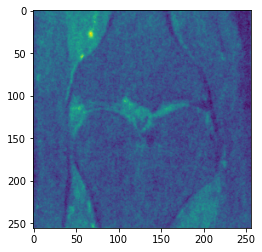

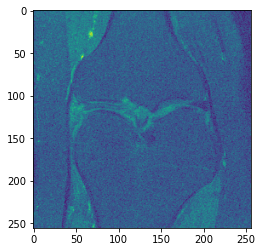

False

In [4]:
import matplotlib.pyplot as plt
import numpy as np
plt.imshow(outp[1][0,:,:,0,0])
plt.show()
plt.imshow(y[1][0,:,:,0,0])
plt.show()
np.all(outp[1][0,:,:,0,0]==0)